#Importando bibliotecas

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from tqdm import tqdm

#Puxando as bases de dados

In [35]:
df_geral = pd.read_csv('https://raw.githubusercontent.com/emmanuelvrm/tera/main/data/df_geral.csv')

In [36]:
df_geral.head()

,game_name,genre_name,stream_id,user_name,published_at,duration,view_count,duration_minutes,month
0,mortal kombat x,Fighting,46194989036,eddy_gms,2022-10-19 00:32:43+00:00,0 days 01:07:36,12,67.600000,10
1,mortal kombat x,Fighting,40367348489,paladinodooeste,2022-10-18 22:30:55+00:00,0 days 01:28:50,9,88.833333,10
2,mortal kombat x,Fighting,40365410985,alankorrea,2022-10-18 14:31:32+00:00,0 days 01:00:35,20,60.583333,10
3,mortal kombat x,Fighting,47321828701,joga_gamingmais,2022-10-18 01:58:21+00:00,0 days 01:04:24,13,64.400000,10
4,mortal kombat x,Fighting,40363170121,paladinodooeste,2022-10-17 22:51:30+00:00,0 days 02:46:19,21,166.316667,10


In [37]:
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837316 entries, 0 to 837315
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   game_name         837316 non-null  object 
 1   genre_name        837316 non-null  object 
 2   stream_id         837316 non-null  int64  
 3   user_name         837316 non-null  object 
 4   published_at      837316 non-null  object 
 5   duration          837316 non-null  object 
 6   view_count        837316 non-null  int64  
 7   duration_minutes  837316 non-null  float64
 8   month             837316 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 57.5+ MB


#EDA

## Subsets para algumas análises

Criando alguns subesets para as análises
1. Tabela com a contagem distinta de jogos jogados por cada usuário, assim como a quantidade distinta de gêneros que os mesmos contemplam.
2. Tabela com a contagem distinta de gêneros para cada um dos jogos

In [38]:
#Para criar uma nova tabela onde o nome de usuário é único por linha com a contagem distinta de jogos e gêneros jogados
df_user = df_geral.groupby('user_name').agg({'game_name': pd.Series.nunique, 'genre_name': pd.Series.nunique})
df_user.rename(columns={'game_name':'game_count', 'genre_name': 'genre_count'},inplace=True)
df_user.head()

,game_count,genre_count
user_name,,
0000fluffycat0000,2,13
002vivi,2,7
007doak,3,11
007letogamer,1,3
00fawkes00,1,9


In [39]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45025 entries, 0000fluffycat0000 to 私はゼロです_
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   game_count   45025 non-null  int64
 1   genre_count  45025 non-null  int64
dtypes: int64(2)
memory usage: 1.0+ MB


In [40]:
#Para criar uma nova tabela com a quantidade de gêneros por cada jogo
df_game = df_geral.groupby('game_name').agg({'genre_name': pd.Series.nunique})
df_game.rename(columns={'genre_name':'genre_count'},inplace=True)
df_game.head()

,genre_count
game_name,
.hack//g.u. vol. 1: rebirth,4
.hack//infection,4
//todo: today,5
20 minutes till dawn,6
2dark,7


In [41]:
df_game.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2068 entries, .hack//g.u. vol. 1: rebirth to ōkami
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   genre_count  2068 non-null   int64
dtypes: int64(1)
memory usage: 32.3+ KB


## Análises

Aqui queremos entender se as pessoas focam em algum tipo de gênero de jogo.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 25.0)

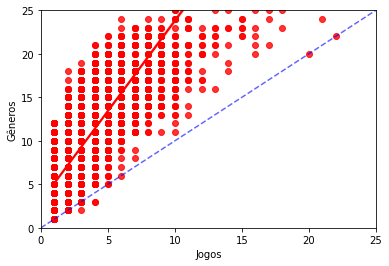

In [42]:
plt.plot(range(26), range(26), '--', color='blue', alpha= 0.6)
sns.regplot(df_user['game_count'], df_user['genre_count'], 'o', color='red')
plt.xlabel('Jogos')
plt.ylabel('Gêneros')
plt.xlim(0,25)
plt.ylim(0,25)


'Podemos ver que todas as observações se encotram abaixo da diagonal, onde o número de jogos é igual ao número de gêneros jogados.\nPortanto vemos uma predominância de jogadores que costumam jogar mais do que apenas um único jogo por gênero'

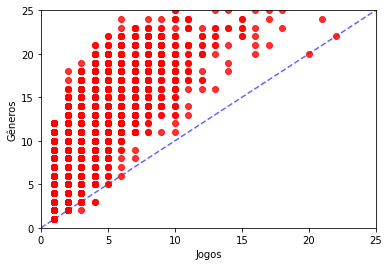

In [43]:
plt.plot(range(26), range(26), '--', color='blue', alpha= 0.6)
plt.plot(df_user['game_count'], df_user['genre_count'], 'o', color='red', alpha= 0.8)
plt.xlabel('Jogos')
plt.ylabel('Gêneros')
plt.xlim(0,25)
plt.ylim(0,25)

'''Podemos ver que todas as observações se encotram acima da diagonal, 
indicando que a quantidade de gêneros é maior que a quantidade de jogos jogados.
Portanto vemos que existem vários jogos com vários gêneros associados.'''

Text(3.674999999999997, 0.5, 'Jogos')

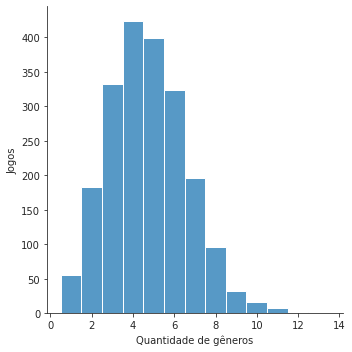

In [44]:
sns.set_style("ticks")
sns.displot(df_game, x = 'genre_count', binwidth = 1, discrete = True)
plt.xlabel('Quantidade de gêneros')
plt.ylabel('Jogos')
'''
Nesse gráfico vemos que os jogos têm, em média, de 3 a 6 gêneros associados.
'''

Aqui o foco é entender aonde fica a concentração dos usuários por quantidade de jogos jogados.

In [78]:
acumulada = pd.DataFrame()
acumulada['count'] = df_user.groupby('game_count').count()
acumulada['count_ac'] = np.cumsum(acumulada['count'])
acumulada['freq_ac'] = acumulada['count_ac']/sum(acumulada['count'])
acumulada
'''
Aqui temos que aproximadamento 70% da base de usuários se concentram em jogar apenas 1 tipo de jogo. Isso levanta a pergunta: Por quê temos
uma concentração tão grande de pessoas jogando apenas 1 jogo, mas uma baixa concentração de pessoas jogando apenas 1 tipo gênero?
A resposta é: porque o mesmo jogo pode ter vários gêneros diferentes associados.
'''

,count,count_ac,freq_ac
game_count,,,
1,31510,31510,0.699833
2,7665,39175,0.870072
3,2832,42007,0.932971
4,1346,43353,0.962865
5,693,44046,0.978257
6,378,44424,0.986652
7,226,44650,0.991671
8,146,44796,0.994914
9,85,44881,0.996802


'\nAqui temos que aproximadamento 70% da base de usuários se concentram em jogar apenas 1 tipo de jogo. Isso levanta a pergunta: Por quê temos\numa concentração tão grande de pessoas jogando apenas 1 jogo, mas uma baixa concentração de pessoas jogando apenas 1 tipo gênero?\nA resposta é: porque o mesmo jogo pode ter vários gêneros diferentes associados.\n'

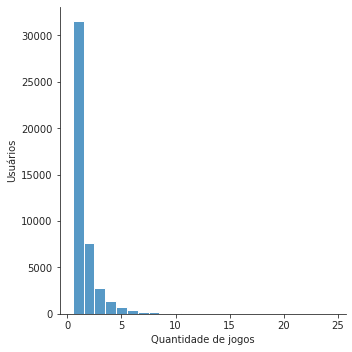

In [85]:
sns.set_style("ticks")
sns.displot(df_user, x = 'game_count', binwidth = 1, discrete = True)
plt.xlabel('Quantidade de jogos')
plt.ylabel('Usuários')
'''
Aqui temos que aproximadamento 70% da base de usuários se concentram em jogar apenas 1 tipo de jogo. Isso levanta a pergunta: Por quê temos
uma concentração tão grande de pessoas jogando apenas 1 jogo, mas uma baixa concentração de pessoas jogando apenas 1 tipo gênero?
A resposta é: porque o mesmo jogo pode ter vários gêneros diferentes associados.
'''

'\nAqui temos que aproximadamento 70% da base de usuários se concentram em jogar apenas 1 tipo de jogo. Isso levanta a pergunta: Por quê temos\numa concentração tão grande de pessoas jogando apenas 1 jogo, mas uma baixa concentração de pessoas jogando apenas 1 tipo gênero?\nA resposta é: porque o mesmo jogo pode ter vários gêneros diferentes associados.\n'

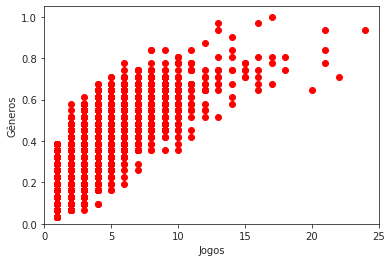

In [82]:
#plt.plot(acumulada['game_count'], acumulada['freq_ac'])
plt.plot(df_user['game_count'], df_user['genre_count']/df_user['genre_count'].max(), 'o', color='red')
plt.xlabel('Jogos')
plt.ylabel('Gêneros')
plt.xlim(0,25)
plt.ylim(0,1.05)

'''
Aqui temos que aproximadamento 70% da base de usuários se concentram em jogar apenas 1 tipo de jogo. Isso levanta a pergunta: Por quê temos
uma concentração tão grande de pessoas jogando apenas 1 jogo, mas uma baixa concentração de pessoas jogando apenas 1 tipo gênero?
A resposta é: porque o mesmo jogo pode ter vários gêneros diferentes associados.
'''